In [224]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score as sw
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [225]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
data = pd.read_csv('adult.data', names=columns, nrows=None, header=None, index_col=None)
data.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [226]:
#### Preprocessing
# Pré-processamento feito para converter os valores String de acordo com seu Encode,
# possibilitando assim que K-MEANS consiga trabalhar com dados numéricos.
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        data[column].replace(' ?', np.nan, inplace=True)
        
df = pd.DataFrame(data)    

def plot_clustering(df, labels, title=None):
    x_min, x_max = np.min(df, axis=0), np.max(df, axis=0)
    df = (df - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1],
               c=labels.astype(np.float))
    #plt.xticks([])
    #plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    #plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])      
#data.head()

<Figure size 288x216 with 0 Axes>

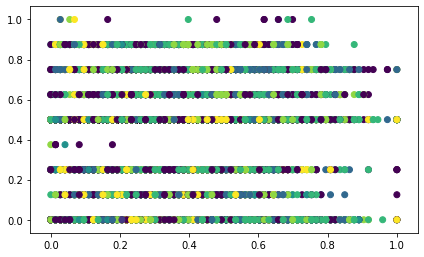

In [227]:
k_means = KMeans(n_clusters=7)
k_means.fit(data) 
labels = k_means.labels_
centroids  = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

plot_clustering(df, labels)
plt.show()

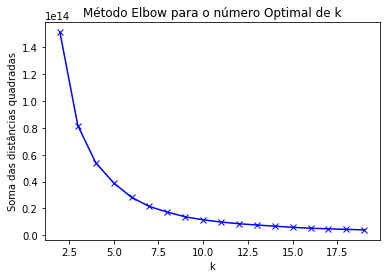

In [228]:
# KMEANS
# O Método Elbow nos ajuda a visualizar o número ideal de clusters para esse conjunto de dados
# O número ideal está entre 5 e 7,5
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das distâncias quadradas')
plt.title('Método Elbow para o número Optimal de k')
plt.show()

In [229]:
# Silhueta
n_cluster = 7
for k in range(n_cluster):
  kmeans = KMeans(n_clusters=k+2, random_state=0).fit(data.loc[:, data.columns != 'Income'])
  labels = kmeans.labels_
  silhouette = sw(df.loc[:, data.columns != 'Income'], labels)
  print('For k='+str(k+2)+' '+'SW:'+' '+str(silhouette))
  print('-------------')

For k=2 SW: 0.5858326225411196
-------------
For k=3 SW: 0.5521135012325068
-------------
For k=4 SW: 0.5565105284114698
-------------
For k=5 SW: 0.5323563417870744
-------------
For k=6 SW: 0.5439069608176007
-------------
For k=7 SW: 0.5444239156426399
-------------
For k=8 SW: 0.5385633321609794
-------------
